In [1]:
!pip install mplsoccer statsbombpy
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
import statsbombpy
from statsbombpy import sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.8 MB/s eta 0:00:00


In [10]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3943043)

In [17]:
team1, team2 = df.team_name.unique()
mask_team1 = (df.type_name == 'Pass') & (df.team_name == team1)


In [18]:
df_pass = df.loc[mask_team1, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
mask_complete = df_pass.outcome_name.isnull()

In [19]:
df_pass.head()

x     y  end_x  end_y outcome_name
9    6.9  39.6    9.1   57.2          NaN
12   8.9  57.2   20.6   75.8          NaN
16  28.6  76.4   50.2   68.5          NaN
21  61.9  67.1   65.1   66.9   Incomplete
24  72.5  80.0   70.4   73.3          NaN

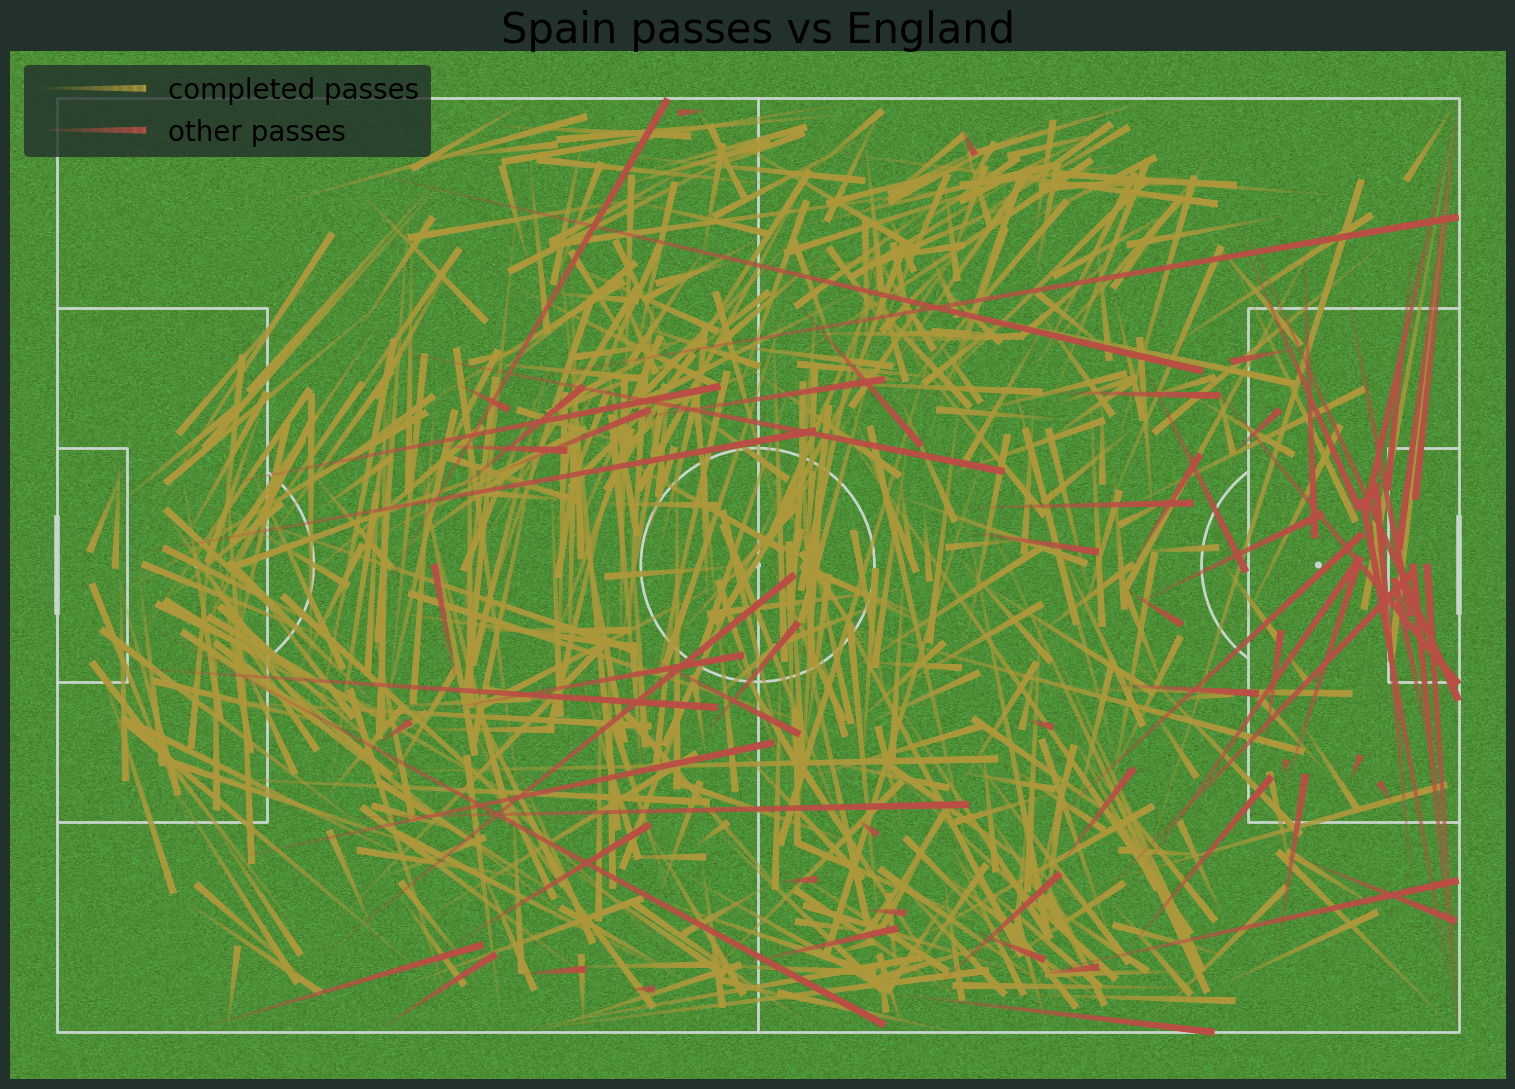

In [24]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the completed passes
lc1 = pitch.lines(df_pass[mask_complete].x, df_pass[mask_complete].y,
                  df_pass[mask_complete].end_x, df_pass[mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed passes',
                  color='#ad993c', ax=ax)

# Plot the other passes
lc2 = pitch.lines(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
                  df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='other passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
ax_title = ax.set_title(f'{team1} passes vs {team2}', fontsize=30)

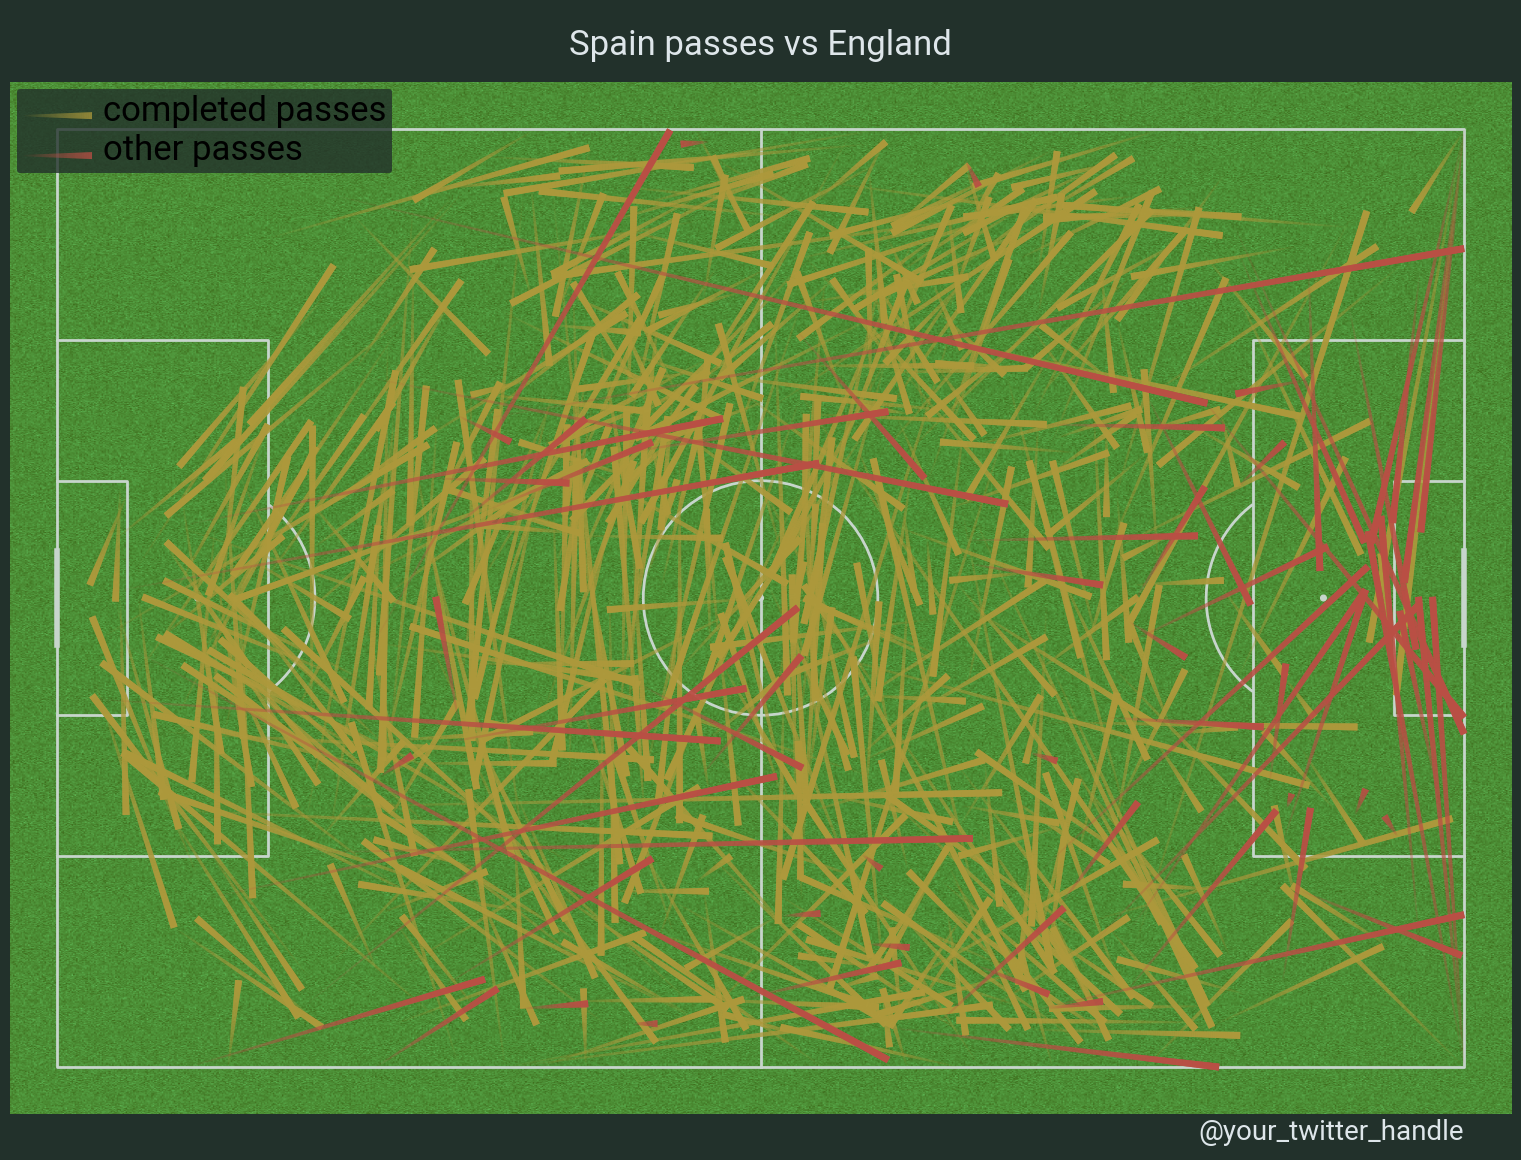

In [25]:
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=12,
                      title_height=0.06, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('#22312b')

# Plot the completed passes
lc1 = pitch.lines(df_pass[mask_complete].x, df_pass[mask_complete].y,
                  df_pass[mask_complete].end_x, df_pass[mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed passes',
                  color='#ad993c', ax=axs['pitch'])

# Plot the other passes
lc2 = pitch.lines(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
                  df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='other passes',
                  color='#ba4f45', ax=axs['pitch'])

# fontmanager for google font (robotto)
robotto_regular = FontManager()

# setup the legend
legend = axs['pitch'].legend(facecolor='#22312b', handlelength=5, edgecolor='None',
                             prop=robotto_regular.prop, loc='upper left')
for text in legend.get_texts():
    text.set_fontsize(25)

# endnote and title
axs['endnote'].text(1, 0.5, '@your_twitter_handle', va='center', ha='right', fontsize=20,
                    fontproperties=robotto_regular.prop, color='#dee6ea')
ax_title = axs['title'].text(0.5, 0.5, f'{team1} passes vs {team2}', color='#dee6ea',
                             va='center', ha='center',
                             fontproperties=robotto_regular.prop, fontsize=25)